In [69]:
import datetime as dt

import pandas as pd
from fuzzywuzzy import process

/home/alberto/miniconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [70]:
df = pd.read_csv("./data/bikes2016.csv")

In [71]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [72]:
df["TS"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [73]:
df.dtypes

Date                           datetime64[ns]
Timestamp                              object
Berri1                                  int64
Boyer                                   int64
Brébeuf                                 int64
CSC (Côte Sainte-Catherine)           float64
Maisonneuve_2                         float64
Maisonneuve_3                           int64
Notre-Dame                              int64
Parc                                    int64
PierDup                                 int64
Pont_Jacques_Cartier                    int64
Rachel / Hôtel de Ville               float64
Rachel / Papineau                       int64
René-Lévesque                           int64
Saint-Antoine                           int64
Saint-Urbain                            int64
Totem_Laurier                           int64
University                              int64
Viger                                   int64
TS                             datetime64[ns]
dtype: object

In [74]:
df.shape

(366, 21)

In [75]:
df.dtypes

Date                           datetime64[ns]
Timestamp                              object
Berri1                                  int64
Boyer                                   int64
Brébeuf                                 int64
CSC (Côte Sainte-Catherine)           float64
Maisonneuve_2                         float64
Maisonneuve_3                           int64
Notre-Dame                              int64
Parc                                    int64
PierDup                                 int64
Pont_Jacques_Cartier                    int64
Rachel / Hôtel de Ville               float64
Rachel / Papineau                       int64
René-Lévesque                           int64
Saint-Antoine                           int64
Saint-Urbain                            int64
Totem_Laurier                           int64
University                              int64
Viger                                   int64
TS                             datetime64[ns]
dtype: object

In [76]:
mask = (df["TS"] >= dt.datetime(2016, 3, 1)) & (df["TS"] < dt.datetime(2016, 4, 1))

In [77]:
df[mask]

,Date,Timestamp,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger,TS
60,2016-03-01,00:00,247,0,3,0.0,372.0,90,14,52,...,9,NaN,349,92,43,1,55,176,47,2016-03-01
61,2016-03-02,00:00,171,3,1,0.0,244.0,71,14,3,...,7,NaN,181,3,28,1,24,86,28,2016-03-02
62,2016-03-03,00:00,218,1,4,0.0,305.0,88,15,6,...,11,NaN,293,55,29,81,41,147,62,2016-03-03
63,2016-03-04,00:00,288,1,18,0.0,311.0,84,20,4,...,9,NaN,291,151,36,129,116,152,52,2016-03-04
64,2016-03-05,00:00,142,12,37,3.0,180.0,81,8,5,...,21,NaN,268,42,17,85,78,65,18,2016-03-05
65,2016-03-06,00:00,165,3,12,2.0,200.0,66,12,5,...,18,NaN,258,52,14,99,102,80,17,2016-03-06
66,2016-03-07,00:00,306,2,7,11.0,408.0,112,23,44,...,8,NaN,397,100,44,88,154,246,52,2016-03-07
67,2016-03-08,00:00,455,4,5,47.0,652.0,181,25,53,...,26,NaN,557,165,66,267,276,76,66,2016-03-08
68,2016-03-09,00:00,549,34,5,196.0,791.0,250,31,332,...,57,NaN,633,228,83,321,360,290,76,2016-03-09
69,2016-03-10,00:00,579,48,13,269.0,779.0,269,50,417,...,199,NaN,724,238,102,345,381,0,71,2016-03-10


In [78]:
df["Berri1"].sum()

988595

In [79]:
df.loc[df["TS"].dt.month == 2, "Berri1"].sum()

8432

In [80]:
df.groupby([df["TS"].dt.year, df["TS"].dt.month])["Berri1"].sum()

TS    TS
2016  1       8503
      2       8432
      3      17294
      4      62759
      5     136001
      6     145972
      7     156673
      8     146558
      9     145296
      10     96285
      11     52637
      12     12185
Name: Berri1, dtype: int64

In [81]:
import datetime as dt

dt.datetime.now() + dt.timedelta(days=1)

datetime.datetime(2024, 2, 3, 12, 11, 31, 58371)

In [82]:
df.head()

,Date,Timestamp,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger,TS
0,2016-01-01,00:00,32,0,27,0.0,51.0,16,1,5,...,13,NaN,93,12,6,38,68,14,11,2016-01-01
1,2016-01-02,00:00,68,0,6,0.0,93.0,25,2,16,...,9,NaN,141,16,11,67,106,30,14,2016-01-02
2,2016-01-03,00:00,78,3,4,0.0,118.0,38,0,6,...,6,NaN,116,25,10,21,59,25,5,2016-01-03
3,2016-01-04,00:00,118,6,60,2.0,165.0,80,0,46,...,3,NaN,202,49,9,4,99,111,29,2016-01-04
4,2016-01-05,00:00,183,2,25,2.0,239.0,86,2,110,...,3,NaN,241,77,12,11,106,158,44,2016-01-05


In [83]:
df.describe()

,Date,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger,TS
count,366,366.000000,366.000000,366.000000,344.000000,321.000000,366.000000,366.000000,366.000000,366.000000,366.000000,197.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366
mean,2016-07-01 12:00:00,2701.079235,2014.806011,2448.661202,1354.377907,3655.271028,997.868852,1039.554645,1713.475410,1003.677596,1350.153005,2617.436548,2215.270492,1380.814208,326.005464,1033.218579,2074.704918,1804.426230,278.161202,2016-07-01 12:00:00
min,2016-01-01 00:00:00,32.000000,0.000000,0.000000,0.000000,51.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,3.000000,2016-01-01 00:00:00
25%,2016-04-01 06:00:00,456.250000,81.000000,25.000000,146.000000,737.000000,172.250000,74.500000,281.500000,16.750000,55.250000,1744.000000,231.000000,162.000000,56.500000,211.500000,389.250000,286.250000,58.000000,2016-04-01 06:00:00
50%,2016-07-01 12:00:00,2381.500000,1671.000000,2285.500000,966.500000,3615.000000,889.000000,828.500000,1559.000000,473.500000,1132.500000,3023.000000,868.500000,1158.000000,241.500000,1003.000000,2133.500000,1386.500000,209.000000,2016-07-01 12:00:00
75%,2016-09-30 18:00:00,4764.000000,3798.250000,4623.750000,2298.250000,6169.000000,1752.000000,1947.750000,3044.250000,1888.000000,2451.000000,3675.000000,4374.750000,2484.500000,595.000000,1762.250000,3587.500000,3394.500000,501.500000,2016-09-30 18:00:00
max,2016-12-31 00:00:00,7544.000000,6345.000000,7213.000000,5337.000000,9473.000000,2859.000000,3151.000000,5290.000000,4692.000000,6548.000000,5078.000000,9274.000000,7937.000000,1019.000000,3458.000000,5454.000000,5201.000000,833.000000,2016-12-31 00:00:00
std,NaN,2290.608915,1885.597160,2330.047624,1328.688271,2787.244466,849.511511,998.491411,1462.387971,1126.906321,1296.788418,1335.710772,2378.215368,1276.218008,296.934161,849.637193,1636.311124,1623.761046,245.359861,NaN


In [84]:
df["Date"].value_counts()

Date
2016-01-01    1
2016-09-08    1
2016-09-06    1
2016-09-05    1
2016-09-04    1
             ..
2016-04-30    1
2016-04-29    1
2016-04-28    1
2016-04-27    1
2016-12-31    1
Name: count, Length: 366, dtype: int64

In [85]:
df["Date"]

0     2016-01-01
1     2016-01-02
2     2016-01-03
3     2016-01-04
4     2016-01-05
         ...    
361   2016-12-27
362   2016-12-28
363   2016-12-29
364   2016-12-30
365   2016-12-31
Name: Date, Length: 366, dtype: datetime64[ns]

In [86]:
df.head()

,Date,Timestamp,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger,TS
0,2016-01-01,00:00,32,0,27,0.0,51.0,16,1,5,...,13,NaN,93,12,6,38,68,14,11,2016-01-01
1,2016-01-02,00:00,68,0,6,0.0,93.0,25,2,16,...,9,NaN,141,16,11,67,106,30,14,2016-01-02
2,2016-01-03,00:00,78,3,4,0.0,118.0,38,0,6,...,6,NaN,116,25,10,21,59,25,5,2016-01-03
3,2016-01-04,00:00,118,6,60,2.0,165.0,80,0,46,...,3,NaN,202,49,9,4,99,111,29,2016-01-04
4,2016-01-05,00:00,183,2,25,2.0,239.0,86,2,110,...,3,NaN,241,77,12,11,106,158,44,2016-01-05


In [87]:
df1 = df.melt(id_vars=["TS", "Date", "Timestamp"], var_name="barrio", value_name="n_personas")

In [88]:
18 * 366

6588

In [89]:
df1["Mes"] = df1["TS"].dt.month

In [90]:
res = df1.groupby(["barrio", "Mes"])["n_personas"].mean().reset_index()

In [91]:
res = res.pivot(index="barrio", columns="Mes", values="n_personas").round(2)

In [92]:
res.to_csv("bikes_resumen.csv")

In [93]:
df1

,TS,Date,Timestamp,barrio,n_personas,Mes
0,2016-01-01,2016-01-01,00:00,Berri1,32.0,1
1,2016-01-02,2016-01-02,00:00,Berri1,68.0,1
2,2016-01-03,2016-01-03,00:00,Berri1,78.0,1
3,2016-01-04,2016-01-04,00:00,Berri1,118.0,1
4,2016-01-05,2016-01-05,00:00,Berri1,183.0,1
...,...,...,...,...,...,...
6583,2016-12-27,2016-12-27,00:00,Viger,11.0,12
6584,2016-12-28,2016-12-28,00:00,Viger,19.0,12
6585,2016-12-29,2016-12-29,00:00,Viger,14.0,12
6586,2016-12-30,2016-12-30,00:00,Viger,3.0,12


In [94]:
df2 = pd.read_csv("data/localisationcompteursvelo2015.csv", encoding="latin1")

In [95]:
all = df1.merge(df2, how="left", left_on="barrio", right_on="nom_comptage")

In [96]:
a = all[["barrio", "nom_comptage"]].drop_duplicates()

In [97]:
a[a.isna().any(axis=1)]

,barrio,nom_comptage
1098,CSC (Côte Sainte-Catherine),NaN
3294,Pont_Jacques_Cartier,NaN
3660,Rachel / Hôtel de Ville,NaN
4026,Rachel / Papineau,NaN


In [98]:
df2["nom_comptage"].sort_values()

18                       Berri1
15                        Boyer
1                       Brébeuf
6                           CSC
2                 Maisonneuve_1
3                 Maisonneuve_2
11                Maisonneuve_3
12                   Notre-Dame
13                         Parc
19             Parc U-Zelt Test
8                       PierDup
7          Pont Jacques-Cartier
14        Rachel/Hôtel de Ville
4               Rachel/Papineau
16                René-Lévesque
9                 Saint-Antoine
20    Saint-Laurent U-Zelt Test
0                  Saint-Urbain
17                Totem_Laurier
5                    University
10                        Viger
Name: nom_comptage, dtype: object

In [99]:
df1["barrio"].unique()

array(['Berri1', 'Boyer', 'Brébeuf', 'CSC (Côte Sainte-Catherine)',
       'Maisonneuve_2', 'Maisonneuve_3', 'Notre-Dame', 'Parc', 'PierDup',
       'Pont_Jacques_Cartier', 'Rachel / Hôtel de Ville',
       'Rachel / Papineau', 'René-Lévesque', 'Saint-Antoine',
       'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger'],
      dtype=object)

In [100]:
df1.head()

,TS,Date,Timestamp,barrio,n_personas,Mes
0,2016-01-01,2016-01-01,00:00,Berri1,32.0,1
1,2016-01-02,2016-01-02,00:00,Berri1,68.0,1
2,2016-01-03,2016-01-03,00:00,Berri1,78.0,1
3,2016-01-04,2016-01-04,00:00,Berri1,118.0,1
4,2016-01-05,2016-01-05,00:00,Berri1,183.0,1


In [101]:
df2.head()

,id,nom,nom_comptage,Etat,Type,Annee_implante,coord_X,coord_Y
0,1,St-Urbain_1,Saint-Urbain,Existant,compteur,2014,-73.588882,45.519549
1,2,Brebeuf_1,Brébeuf,Existant,compteur,2009,-73.573984,45.527411
2,4,Maisonneuve_1,Maisonneuve_1,À réinstaller,compteur,2008,-73.561591,45.514785
3,5,Maisonneuve_2,Maisonneuve_2,Existant,compteur,2008,-73.575078,45.500544
4,6,Rachel/Papineau,Rachel/Papineau,Existant,compteur,2007,-73.569649,45.530355


In [102]:
candidatos = df2["nom_comptage"].drop_duplicates().tolist()

In [103]:
df1["barrio"] = df1["barrio"].str.replace("\(.*\)", "", regex=True)

In [104]:
to_replace = {val: process.extractOne(val, candidatos)[0] for val in df1["barrio"].unique()}

In [105]:
to_replace

{'Berri1': 'Berri1',
 'Boyer': 'Boyer',
 'Brébeuf': 'Brébeuf',
 'CSC ': 'CSC',
 'Maisonneuve_2': 'Maisonneuve_2',
 'Maisonneuve_3': 'Maisonneuve_3',
 'Notre-Dame': 'Notre-Dame',
 'Parc': 'Parc',
 'PierDup': 'PierDup',
 'Pont_Jacques_Cartier': 'Pont Jacques-Cartier',
 'Rachel / Hôtel de Ville': 'Rachel/Hôtel de Ville',
 'Rachel / Papineau': 'Rachel/Papineau',
 'René-Lévesque': 'René-Lévesque',
 'Saint-Antoine': 'Saint-Antoine',
 'Saint-Urbain': 'Saint-Urbain',
 'Totem_Laurier': 'Totem_Laurier',
 'University': 'University',
 'Viger': 'Viger'}

In [106]:
df1 = df1.replace({"barrio": to_replace})

In [107]:
all = df1.merge(df2, how="left", left_on="barrio", right_on="nom_comptage")

In [108]:
all[["barrio", "nom_comptage"]].drop_duplicates()

,barrio,nom_comptage
0,Berri1,Berri1
366,Boyer,Boyer
732,Brébeuf,Brébeuf
1098,CSC,CSC
1464,Maisonneuve_2,Maisonneuve_2
1830,Maisonneuve_3,Maisonneuve_3
2196,Notre-Dame,Notre-Dame
2562,Parc,Parc
2928,PierDup,PierDup
3294,Pont Jacques-Cartier,Pont Jacques-Cartier


Operaciones con strings: `lower`, `upper`, `replace`, `contains`, `match`, `extract`, `split`, `join`

In [109]:
df1["barrio"].str.split("/", n=2, expand=True).drop_duplicates()

,0,1
0,Berri1,None
366,Boyer,None
732,Brébeuf,None
1098,CSC,None
1464,Maisonneuve_2,None
1830,Maisonneuve_3,None
2196,Notre-Dame,None
2562,Parc,None
2928,PierDup,None
3294,Pont Jacques-Cartier,None


In [110]:
df1["barrio"].str.extract("^(.*)[-_\s]").dropna()

,0
1464,Maisonneuve
1465,Maisonneuve
1466,Maisonneuve
1467,Maisonneuve
1468,Maisonneuve
...,...
5851,Totem
5852,Totem
5853,Totem
5854,Totem


<AxesSubplot:xlabel='Date'>

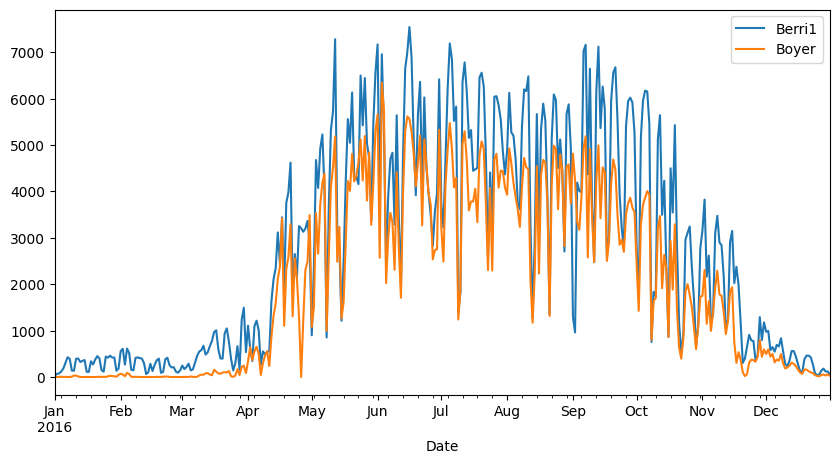

In [158]:
df.plot(x="Date", y=["Berri1", "Boyer"], figsize=(10, 5))

<AxesSubplot:ylabel='Frequency'>

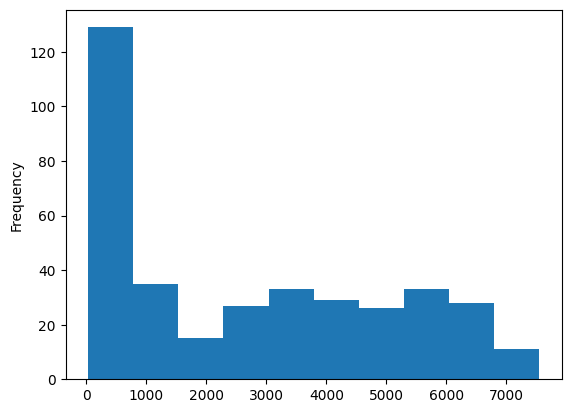

In [160]:
df["Berri1"].plot(kind="hist")

In [121]:
bicis = pd.read_csv(
    "data/AccidentesBicicletas_2017.csv",
    sep=";",
    skiprows=2,
    encoding="latin1",
    parse_dates=["Fecha"],
    date_format="%d/%m/%Y %H:%M",
)

In [132]:
bicis.columns

Index(['Fecha', 'TRAMO HORARIO', 'Nm Tot Victimas', 'DISTRITO', 'Lugar',
       'Numero', 'Tipo Accidente', 'Tipo Vehiculo'],
      dtype='object')

In [129]:
bicis["DISTRITO"] = bicis["DISTRITO"].str.strip()

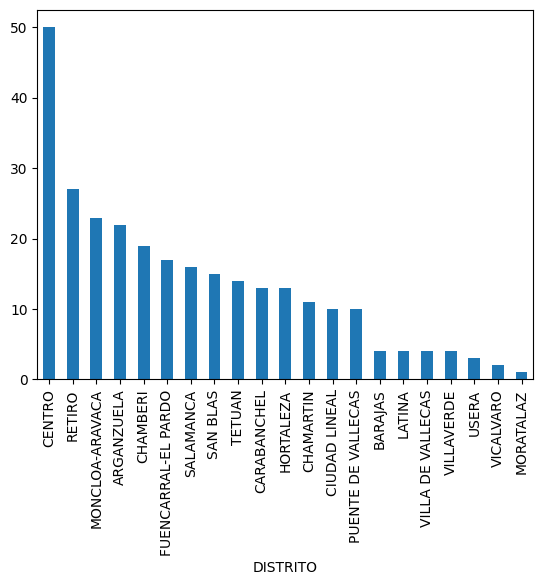

In [131]:
bicis["DISTRITO"].value_counts().plot(kind="bar");

<AxesSubplot:xlabel='Fecha'>

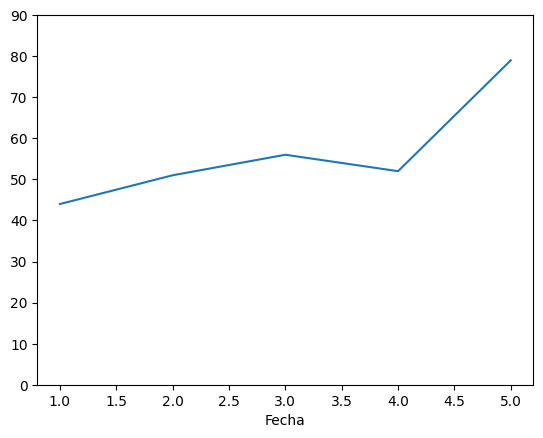

In [144]:
bicis.groupby(bicis["Fecha"].dt.month).size().plot(kind="line", ylim=(0, 90))

<AxesSubplot:xlabel='Fecha', ylabel='DISTRITO'>

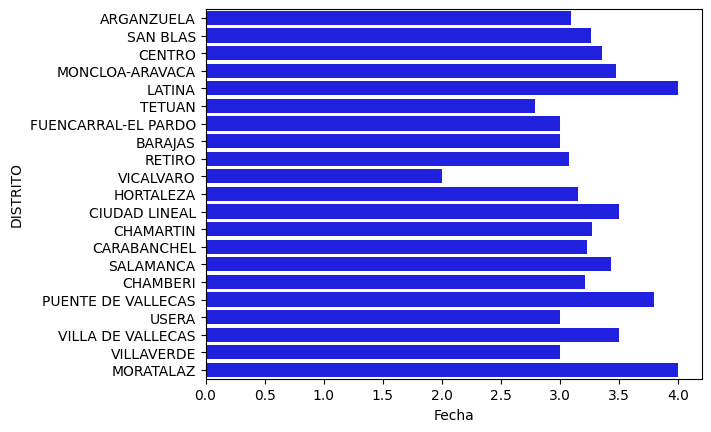

In [152]:
import seaborn as sns

sns.barplot(data=bicis, x=bicis["Fecha"].dt.month, y=bicis["DISTRITO"], errorbar=None, color="blue")